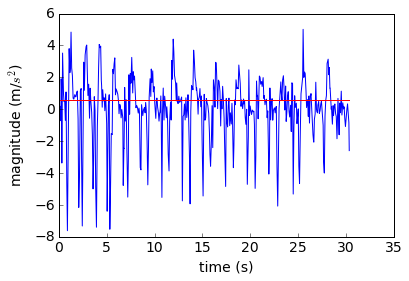

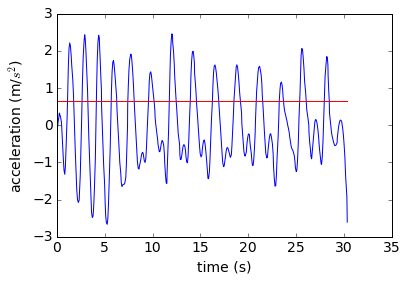

Threshold: 45
Threshold With Low Pass Filter: 14


In [10]:
import urllib
import matplotlib.pyplot as plt
import csv
import sys
from math import *
from matplotlib import *
import numpy as np
from scipy import *
import scipy.signal as signal
import scipy.ndimage as ndimage
import matplotlib.pyplot as mp
import time as tm

%matplotlib inline

def zero_cross(x_arr, y_arr, filt):
    #Find zero-cross line
    ymax = max(y_arr)
    ymin = min(y_arr)
    alpha = 0.65
    zero_cross = alpha * (ymax-ymin) + ymin
    
    #Zero-Crossing Detection Algorithm
    step_counter = 0
    i = 1
    last = 0
    while i < len(y_arr):
        #If the data crossed the zero cross line while increasing
        if float(y_arr[i]) > zero_cross and float(y_arr[i-1]) < zero_cross:
            #If filtered, count repetition, else use refactoring period of 0.3 seconds
            if(filt == True):
                step_counter += 1
            elif(filt == False):
                if(float(x_arr[i]) > (last + .3)):
                    step_counter += 1
                    last = x_arr[i]
        i += 1
    return step_counter

def zero_cross_visual(x_arr, y_arr):
    ymax = max(y_arr)
    ymin = min(y_arr)
    alpha = 0.65
    zero_cross = alpha * (ymax-ymin) + ymin
    horizontal_line_arr = []
    i = 0
    while i < len(y_arr):
        horizontal_line_arr.append(float(zero_cross))
        i += 1
    return horizontal_line_arr

# File name
action = 'Accelerometer Data/S5/acc_S5pushup1_0t'
file_name = action + '.csv'
csv_reader = csv.reader(open(file_name))

verts = []

#Get data from CSV file
for row in csv_reader:
    verts.append(row)

time = []
mag = []

for vert in verts:
    time.append(float(vert[0])-float(verts[0][0]))
    #Convert to the magnitude of acceleration
    mag.append(sqrt(float(vert[1])**2 + float(vert[2])**2 + float(vert[3])**2))

mag= signal.detrend(mag)

verts=np.array(verts)
    
#Butterworth Filter
N = 2 #Filter order
fs = (len(mag)-1)/time[len(time)-1]
Wn = 0.01*fs #Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')

# Filter accelerometer data
magf = signal.filtfilt(B,A, mag)

# Graph data
plt.plot(time, mag)
ax = plt.subplot(111)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.plot(time, zero_cross_visual(time, mag), color="red")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.xlabel('time (s)',size=14)
plt.ylabel('magnitude (m/$s^2$)', size=14)
# Save file
directory = "C:/Users/Student.121-GMASTER/Box Sync/Junior/SIR/Figures"
savepath = os.path.join(directory, "Magnitude Graph.svg")

plt.savefig(savepath)
plt.show()

plt.plot(time, magf)
plt.plot(time, zero_cross_visual(time, magf), color="red")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.xlabel('time (s)',size=14)
plt.ylabel('acceleration (m/$s^2$)', size=14)
# Save file
savepath = os.path.join(directory, "Filtered Graph.svg")
plt.savefig(savepath)

plt.show()

# Print out results of Threshold Crossing
c1=zero_cross(time, mag, False)
c2=zero_cross(time, magf, True)
print("Threshold: " + str(c1))
print("Threshold With Low Pass Filter: " + str(c2))

In [2]:
c1

47

In [ ]:
c2